## Detecção pela webcam 

In [1]:
# This is needed to display the images.
%matplotlib inline
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar a webcam

# Using OpenCV to initialize the webcam
cap = cv2.VideoCapture(0)

with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        while True:
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
            
            cv2.imshow('MobileNet SSD - Object Detection', image_np)
            if cv2.waitKey(1) == 13: #13 is the Enter Key
                break
            
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()   


/anaconda3/envs/ambCV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/ambCV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/ambCV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/ambCV2/lib/python3.7/site-packages/tensorflow/python/framework/dty

## SDD rodando para um arquivo de vídeo

In [1]:
# This is needed to display the images.
%matplotlib inline
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar a webcam

# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('dashcam2.mp4')


with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        while True:
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
            
            cv2.imshow('MobileNet SSD - Object Detection', image_np)
            if cv2.waitKey(1) == 13: #13 is the Enter Key
                break
            
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()  


/anaconda3/envs/ambCV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/ambCV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/ambCV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/ambCV2/lib/python3.7/site-packages/tensorflow/python/framework/dty

## Visualizando dentro do JUPYTER 

In [2]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output

import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar a webcam

# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('dashcam2.mp4')

with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            

            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
        
            #if cv2.waitKey(1) == 13: #13 is the Enter Key 
                #break

# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  



KeyboardInterrupt: 

## Para otimizar o aprendizado vou fazer um scrapy do youtube com Beautiful Soup e jogar para o modelo.....

## TESTE RODANDO DIRETO DO YOUTUBE

In [ ]:
!pip install pafy

In [ ]:
!pip install --upgrade youtube-dl

In [3]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy


import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)



# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')

with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            

            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
        
            #if cv2.waitKey(1) == 13: #13 is the Enter Key 
                #break

# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  



KeyboardInterrupt: 

In [ ]:
## O srapy foi feito para dentro do links.csv
#pego o título e o url do vídeo para treinar/validar o modelo
!cat links.csv

## Vamos extrair informações do vídeo....



In [4]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy
import csv 
import pandas as pd



import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
#cap = cv2.VideoCapture(best.url)



# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('dashcam2.mp4')


#matriz para compor a rede neural 
matriz =  csv.writer(open("dadosReconhecidos.csv","w"))
with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            millis = get_current_position(cap)
            #print(millis)
            #print("\n..............\n")
            '''
            data = {}
            i=0
            while ((output_dict['detection_scores'][i]) > 0.49999):
                chave = output_dict['detection_classes'][i]
                #print((output_dict['detection_scores'][i]))
                data.setdefault(chave,[]).append(output_dict['detection_scores'][i])
                i+=1


            print(data)    

            '''
            #nao vou usar em um primeiro momento 
            #Coordenadasboxes= np.squeeze(boxes) 
            ClassesCoordenadas = np.squeeze(classes).astype(np.int32)
            Scoresdetectados = np.squeeze(scores)
            #Indcateg = category_index
            #visualizando
            '''
            print('..........\n')
            print(ClassesCoordenadas)
            print('.....\n')
            print(Scoresdetectados)
            
            '''
            data = {}
            i=1
            while ((Scoresdetectados[i]) > 0.49999):
                chave = ClassesCoordenadas[i]
                #print((output_dict['detection_scores'][i]))
                #data.setdefault(chave,[]).append(ClassesCoordenadas[i])
                data.setdefault(chave,[]).append(i)
                i+=1
            LisCh = list(data.keys())
            #TamLisCh = len(list(data.keys()))
            LisVal = list(data.values())
            
            print("\n.......\n")
            print("Tempo Frame - ",millis)
            print("Extr. do Frame - ",data)
            listaDados = [millis,data]
            for i in range(len(list(data.keys()))):
                print("Obj Encontrado - ",LisCh[i])
                listaDados.append(LisCh[i])
                print("Qtd Obj. Econtrados - ",len(LisVal[i]))
                listaDados.append(len(LisVal[i])/100)
                
            matriz.writerow(listaDados)
            

            print("\n.......\n")
            '''
            for key in data:
                print(millis,data,key,data[key],len(data[key]))
                matriz.writerow([millis,data,key,data[key],len(data[key])]) 

            '''

            #print(millis,ke)
            #criaando o database..
            
            '''
            with open('arqVideo.txt','a') as arq:
                arq.write("Tempo em milissegundos {} \n".format(millis)+"\n")
                #arq.write("Coordenadas dections boxes: {} \n".format(Coordenadasboxes)+"\n")

                arq.write("Classes Coordenadas: {} \n".format(ClassesCoordenadas) +"\n")
                arq.write("Scores detectados: {} \n".format(Scoresdetectados)+"\n")
                #arq.write("Índices de Categorias: {} \n".format(Indcateg)+"\n")

            arq.close()
            
            
            #só rodar quando precisa visualizar .....
            
            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
            '''
            
            
        
                
            if cv2.waitKey(1) == 13: #13 is the Enter Key 
                sys.exit()
                #break


# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  


Populating the interactive namespace from numpy and matplotlib

.......

Tempo Frame -  33
Extr. do Frame -  {1: [1, 2, 3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3

.......


.......

Tempo Frame -  66
Extr. do Frame -  {1: [1, 2, 4, 5], 3: [3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  100
Extr. do Frame -  {1: [1, 2, 3], 3: [4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  133
Extr. do Frame -  {1: [1, 2, 3, 5], 3: [4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  166
Extr. do Frame -  {1: [1, 3, 4, 5, 6], 3: [2]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  5
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  200
Extr. do Frame -  {1: [1, 2, 4, 5], 3: [3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4
Obj Encontra

KeyboardInterrupt: 

In [ ]:
!ls

In [5]:
!cat dadosReconhecidos.csv

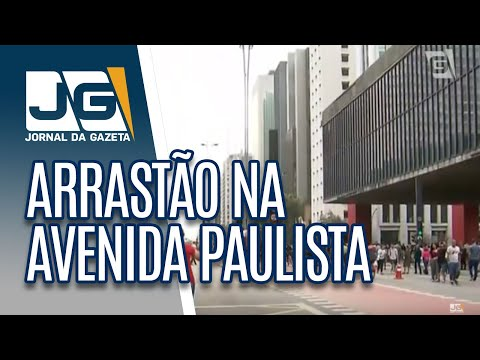

In [6]:
#video para o treino
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('I4iz_wAM0nk') 

## AGORA VAMOS EXTRAIR AS INFORMAÇÕES DO VÍDEO

In [17]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy
import csv 
import pandas as pd



import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
#url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
url = "www.youtube.com/watch?v=I4iz_wAM0nk"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)
# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')


df = pd.DataFrame()

#matriz para compor a rede neural 
matriz =  csv.writer(open("Reuniao11.csv","w"))
with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            millis = get_current_position(cap)
            #print(millis)
            #print("\n..............\n")
            '''
            data = {}
            i=0
            while ((output_dict['detection_scores'][i]) > 0.49999):
                chave = output_dict['detection_classes'][i]
                #print((output_dict['detection_scores'][i]))
                data.setdefault(chave,[]).append(output_dict['detection_scores'][i])
                i+=1


            print(data)    

            '''
            #nao vou usar em um primeiro momento 
            #Coordenadasboxes= np.squeeze(boxes) 
            ClassesCoordenadas = np.squeeze(classes).astype(np.int32)
            Scoresdetectados = np.squeeze(scores)
            #Indcateg = category_index
            #visualizando
            '''
            print('..........\n')
            print(ClassesCoordenadas)
            print('.....\n')
            print(Scoresdetectados)
            
            '''

            data = {}
            i=1
            while ((Scoresdetectados[i]) > 0.49999):
                chave = ClassesCoordenadas[i]
                #print((output_dict['detection_scores'][i]))
                #data.setdefault(chave,[]).append(ClassesCoordenadas[i])
                data.setdefault(chave,[]).append(i)
                i+=1
            LisCh = list(data.keys())
            #TamLisCh = len(list(data.keys()))
            LisVal = list(data.values())
            
            #print("\n.......\n")
            #print("Tempo Frame - ",millis)
            #print("Extr. do Frame - ",data)
            #listaDados = [millis,data]
            listaDados = [millis]
            for i in range(len(list(data.keys()))):
                #print("Obj Encontrado - ",LisCh[i])
                listaDados.append(LisCh[i])
                #print("Qtd Obj. Econtrados - ",len(LisVal[i]))
                listaDados.append(len(LisVal[i])/100)
            
            a_series = pd.Series(listaDados)
            #dfTeste = dfTeste.append(a_series, ignore_index=True)
            df = pd.concat([df,a_series])
            #print(listaDados)    
            matriz.writerow(listaDados)
            with open('arqVideoR11.txt','a') as arq:
                arq.writelines(str(listaDados)+";\n|")
            arq.close()
            

            #print("\n.......\n")
            '''
            for key in data:
                print(millis,data,key,data[key],len(data[key]))
                matriz.writerow([millis,data,key,data[key],len(data[key])]) 

            '''

            #print(millis,ke)
            #criaando o database..
            
            '''
            with open('arqVideo.txt','a') as arq:
                arq.write("Tempo em milissegundos {} \n".format(millis)+"\n")
                #arq.write("Coordenadas dections boxes: {} \n".format(Coordenadasboxes)+"\n")

                arq.write("Classes Coordenadas: {} \n".format(ClassesCoordenadas) +"\n")
                arq.write("Scores detectados: {} \n".format(Scoresdetectados)+"\n")
                #arq.write("Índices de Categorias: {} \n".format(Indcateg)+"\n")

            arq.close()
            
            
            #só rodar quando precisa visualizar .....
            
            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
            '''
            
            
        
                
            if cv2.waitKey(1) == 13: #13 is the Enter Key 
                sys.exit()
                #break


# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  


Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/ambCV2/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [8]:
!cat arqVideoR1.txt

[33][66][100][133][166][200][233][266][300][333][367][400][433][467][500][533][567][600][633][667][700][734][767][800][834][867][900][934][967][1001][1034][1067][1101][1134][1167][1201][1234][1267][1301][1334][1368][1401][1434][1468][1501][1534][1568][1601][1634][1668][1701][1735][1768][1801][1835][1868][1901][1935][1968][2002][2035][2068][2102][2135][2168][2202][2235][2268][2302][2335][2369][2402][2435][2469][2502][2535][2569][2602][2635][2669][2702][2736][2769][2802][2836][2869][2902][2936][2969][3003][3036][3069][3103][3136][3169][3203][3236][3269][3303][3336][3370][3403][3436][3470][3503][3536][3570][3603][3636][3670][3703][3737][3770][3803][3837][3870][3903][3937][3970][4004][4037][4070][4104][4137][4170][4204][4237][4270][4304][4337][4371][4404][4437][4471][4504][4537][4571][4604][4637][4671][4704][4738][4771][4804][4838][4871][4904][4938][4971][5005][5038][5071][5105][5138][5171][5205][5238][5271][5305][5338][5372][5405][5438][5472][5505][5538][5572][5605][5638][5672][5705][5739

In [18]:
!cat arqVideoR11.txt

[33];
|[66];
|[100];
|[133];
|[166];
|[200];
|[233];
|[266];
|[300];
|[333];
|[367];
|[400];
|[433];
|[467];
|[500];
|[533];
|[567];
|[600];
|[633];
|[667];
|[700];
|[734];
|[767];
|[800];
|[834];
|[867];
|[900];
|[934];
|[967];
|[1001];
|[1034];
|[1067];
|[1101];
|[1134];
|[1167];
|[1201];
|[1234];
|[1267];
|[1301];
|[1334];
|[1368];
|[1401];
|[1434];
|[1468];
|[1501];
|[1534];
|[1568];
|[1601];
|[1634];
|[1668];
|[1701];
|[1735];
|[1768];
|[1801];
|[1835];
|[1868];
|[1901];
|[1935];
|[1968];
|[2002];
|[2035];
|[2068];
|[2102];
|[2135];
|[2168];
|[2202];
|[2235];
|[2268];
|[2302];
|[2335];
|[2369];
|[2402];
|[2435];
|[2469];
|[2502];
|[2535];
|[2569];
|[2602];
|[2635];
|[2669];
|[2702];
|[2736];
|[2769];
|[2802];
|[2836];
|[2869];
|[2902];
|[2936];
|[2969];
|[3003];
|[3036];
|[3069];
|[3103];
|[3136];
|[3169];
|[3203];
|[3236];
|[3269];
|[3303];
|[3336];
|[3370];
|[3403];
|[3436];
|[3470];
|[3503];
|[3536];
|[3570];
|[3603];
|[3636];
|[3670];
|[3703];
|[3737];
|[3770];
|[3803];
|[3837

In [9]:
fname = "arqVideoR1.txt"
count = 0
with open(fname, 'r') as f:
    for line in f:
        count += 1
print("Total number of lines is:", count)


Total number of lines is: 21842


In [19]:
fname = "arqVideoR11.txt"
count = 0
with open(fname, 'r') as f:
    for line in f:
        count += 1
print("Total number of lines is:", count)


Total number of lines is: 3696


In [20]:
#dataframe de dados...
df

,0
0,33.000
0,66.000
0,100.000
0,133.000
0,166.000
...,...
0,123289.000
1,3.000
2,0.002
3,1.000


In [21]:
#shape do dataframe 
df.shape

(6849, 1)

In [12]:
!cat Reuniao1.csv

In [22]:
!cat Reuniao11.csv

In [13]:
#preciso saber se está mandando tudo para o CSV 
input_file = open("Reuniao1.csv","r+")
reader_file = csv.reader(input_file)
value = len(list(reader_file))
value

3418

In [23]:
#preciso saber se está mandando tudo para o CSV 
input_file = open("Reuniao11.csv","r+")
reader_file = csv.reader(input_file)
value = len(list(reader_file))
value

3337

**É PRECISO VERIFICAR A CARDINALIDADE DO CONJUNTO FUZZY CRIADO DE ACORDO COM O TAMANHO DO VÍDEO **

* O Vídeo possui 2 minutos e 3 segundos....são 123 segundos... 123000 ms 

* O tempo de precessamento mínimo de frama da máquina é 33ms aproximandamente, logo temos 3727.27273 partes de processamento. Teoricamente são 3728 componentes de aprendizagem. 

* Há um problema de cardinalizade/perca de dados...vou tratar com os dados do "Reuniao1.csv" devido à confiabiliade dos dados.

## PROCEDIMENTO DE APRENDIZAGEM 
<em> A análise do vídeo é feita para montar o passo inicial do Aprendizado. Esse é um exemplo que usará somente 1 vídeo para aprender...no caso o linkado em cima...  </em>!

**Faço uma avaliaçao das regiões de interesse e fuzzyfico as informações** 

**BASICAMENTE UMA ANOMALIA EM UM VÍDEO É OUTLIER DA NORMALIZADE DO VÍDEO** 

**NO NOSSO CASO..... É AÍ QUE QUERO ATACAR** 

* Início do vídeo...mantenho zerado 

* Em 0:38 começa a função trapézio...

* 0:48 atinge um primeiro pico até 0:50 e caí rapidamente...lembrando..está em milissegundos..logo todas as quedas ainda aprensentam seu papel no conjunto fuzzy. Não sei até que ponto isso é válido, já que pode jogar um viés nos dados...ou poliur as informações

* Mantenho zerado até 1:00 e vou subindo aos poucos até 1:03 e mantenho o pico até 1:08.

* Deixo zerado até 1:21 e começo a subir...coloco o pico em 1:23 ...1:35 começo a descer...1:37 já zero...há pouca qualidade...ZOOM MUITO FORTE - preciso fazer um teste para avaliar se esse tipo de informação é ou não útil...1:47 eu zero.. e mantenho até o final...

*
**Há o problema de determinar a cardinalidade dos dados...preciso saber o tempo de análise de 1 Frame de vídeo da máquina para particionar os ms**

In [14]:
!pip install -U scikit-fuzzy


Requirement already up-to-date: scikit-fuzzy in /anaconda3/envs/ambCV2/lib/python3.7/site-packages (0.4.2)


In [15]:
!pip install openpyxl


In [16]:
!cat Reuniao11.csv

In [24]:
#TESTE
from openpyxl import Workbook
import csv


wb = Workbook()
ws = wb.active
with open('Reuniao11.csv', 'r') as f:
    for row in csv.reader(f):
        ws.append(row)
wb.save('TESTE1.xlsx')

In [25]:
!cat TESTE.xlsx

PK    0��PAMb�   �      docProps/app.xmlM�=1D��q��A�Bb@�R��{/�dC�B~�9��noF�
�M��<,���EG��8y��.b膈��x`�/�ֻ�/��W2$A0����
;:�X�v|��ퟌ��t4m���x8��ҋp�Q���l��A	��i�d��ڮ����SO��}��h�
��O�î�ƫ�t�i&'��k��hBF��z��@�  Xpv����^)�u����A\�X�9�����i��4Fr�� 7��LP|�A����\���)�P�ȁ�G�!�ܯ����ɤ3z�}:�k�i�����ϓ�s�䟧��MB�p�,	��#[a�'n;r:gB|�����%2���
2?���jP�	1�����Ƭ�}���ߍ���o�=W�XIڄ�F�s�s�l��F��U�ܣ�X��4�5,��x���<͔A��$&�9~MH�+�����@�/$�J��i�#�t&��3�F�u�h�<z���5
�g�F!�i���$����+B>b6r���q��`Z��xNҴ�Y�5�>`��͑u�֑�^7B>b΋���8J���qX��^�I���f��~��3l,��G�J�&�?�24��Y	��Vj���4>�2
�>�zx
7�ƼP��{���7«���9.}ϥ��=�ҷ7#}g�Ӌ[�Fn[���1��4.(cWr���T��)�9����h>�����$���Y-#�K��A$�����*�	�d[%	�T�e7��Bn�S�J��对(�<[�鯡t>,��<_��3C�rK궔��&8J���pN�;g<��w�5��]v�#�0S�C�B�m���:8����
�R�o����x�9��}�Wm�������Q���<�ǈ�!���C�y{_�g��P4ml�$,F�`���,�d`-���Q�RU`1[�+��|L�E�p�\_�ђ�ۦe�n�)wm"R9�i�g���e��U�U[�j=�N��Y�ȟNHc��J��S��+I�U8�E3������qNS�v�

In [26]:
!cat TESTE1.xlsx

PK    ˡ�PAMb�   �      docProps/app.xmlM�=1D��q��A�Bb@�R��{/�dC�B~�9��noF�
�M��<,���EG��8y��.b膈��x`�/�ֻ�/��W2$A0����
;:�X�v|��ퟌ��t4m���x8��ҋp�Q���l��A	��i�d��ڮ����SO��}��h�
��O�î�ƫ�t�i&'��k��hBF��z��@�  Xpv����^)�u����A\�X�9�����i��4Fr�� 7��LP|�A����\���)�P�ȁ�G�!�ܯ����ɤ3z�}:�k�i�����ϓ�s�䟧��MB�p�,	��#[a�'n;r:gB|�����%2���
2?���jP�	1�����Ƭ�}���ߍ���o�=W�XIڄ�F�s�s�l��F��U�ܣ�X��4�5,��x���<͔A��$&�9~MH�+�����@�/$�J��i�#�t&��3�F�u�h�<z���5
�g�F!�i���$����+B>b6r���q��`Z��xNҴ�Y�5�>`��͑u�֑�^7B>b΋���8J���qX��^�I���f��~��3l,��G�J�&�?�24��Y	��Vj���4>�2
�>�zx
7�ƼP��{���7«���9.}ϥ��=�ҷ7#}g�Ӌ[�Fn[���1��4.(cWr���T��)�9����h>�����$���Y-#�K��A$�����*�	�d[%	�T�e7��Bn�S�J��对(�<[�鯡t>,��<_��3C�rK궔��&8J���pN�;g<��w�5��]v�#�0S�C�B�m���:8����
�R�o����x�9��}�Wm�������Q���<�ǈ�!���C�y{_�g��P4ml�$,F�`���,�d`-���Q�RU`1[�+��|L�E�p�\_�ђ�ۦe�n�)wm"R9�i�g���e��U�U[�j=�N��Y�ȟNHc��J��S��+I�U8�E3������qNS�v�

In [27]:
import xlrd as xl                             #Import xlrd package

loc = ("TESTE1.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet
s1.cell_value(0,0)                            #initializing cell from the excel file mentioned through the cell position
  
print("No. of rows:", s1.nrows)               #Counting & Printing thenumber of rows & columns respectively


No. of rows: 3337


In [28]:
print("No. of columns:", s1.ncols)

No. of columns: 5


In [29]:
#row = sheet.row(1) # Selecting the second row
#analisando a linha 455...que havia dando problema anteriormente 
row = s1.row(454) # Selecting the second row
row

[text:'15181', text:'3', text:'0.002', empty:'', empty:'']

In [30]:
import xlrd
book = xlrd.open_workbook("TESTE1.xlsx")
for sheet in book.sheets():
    print(sheet.name)

Sheet


In [31]:
#agora jogar de arquivo .xls para o dataframe 


import pandas as pd 

loc = ("TESTE1.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfTesteEx = pd.read_excel(loc)
dfTesteEx

,33,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,66,NaN,NaN,NaN,NaN
1,100,NaN,NaN,NaN,NaN
2,133,NaN,NaN,NaN,NaN
3,166,NaN,NaN,NaN,NaN
4,200,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3331,111211,1.0,0.002,NaN,NaN
3332,111244,1.0,0.002,NaN,NaN
3333,111277,1.0,0.002,NaN,NaN
3334,111311,1.0,0.002,NaN,NaN


In [33]:
#agora jogar de arquivo .xls para o dataframe 


import pandas as pd 

loc = ("TESTE1.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfTesteEx1 = pd.read_excel(loc)
dfTesteEx1

,33,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,66,NaN,NaN,NaN,NaN
1,100,NaN,NaN,NaN,NaN
2,133,NaN,NaN,NaN,NaN
3,166,NaN,NaN,NaN,NaN
4,200,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3331,111211,1.0,0.002,NaN,NaN
3332,111244,1.0,0.002,NaN,NaN
3333,111277,1.0,0.002,NaN,NaN
3334,111311,1.0,0.002,NaN,NaN


In [32]:
#agora jogar de arquivo .xls para o dataframe 


import pandas as pd 

loc = ("TESTE.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfTesteEx = pd.read_excel(loc,index_col=None, header=None)
dfTesteEx

,0,1,2,3,4
0,33,NaN,NaN,NaN,NaN
1,66,NaN,NaN,NaN,NaN
2,100,NaN,NaN,NaN,NaN
3,133,NaN,NaN,NaN,NaN
4,166,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3413,113913,1.0,0.02,NaN,NaN
3414,113947,1.0,0.02,NaN,NaN
3415,113980,1.0,0.02,NaN,NaN
3416,114013,1.0,0.02,NaN,NaN


In [47]:
#copia de seguranca
import shutil  
shutil.copy("TESTE.xlsx", "TESTECOPIA.xlsx")


'TESTECOPIA.xlsx'

In [48]:
#agora jogar de arquivo .xls para o dataframe 


import pandas as pd 

loc = ("TESTECOPIA.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfTesteEx2 = pd.read_excel(loc,index_col=None, header=None)
dfTesteEx2

,0,1,2,3,4
0,33,NaN,NaN,NaN,NaN
1,66,NaN,NaN,NaN,NaN
2,100,NaN,NaN,NaN,NaN
3,133,NaN,NaN,NaN,NaN
4,166,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3413,113913,1.0,0.02,NaN,NaN
3414,113947,1.0,0.02,NaN,NaN
3415,113980,1.0,0.02,NaN,NaN
3416,114013,1.0,0.02,NaN,NaN


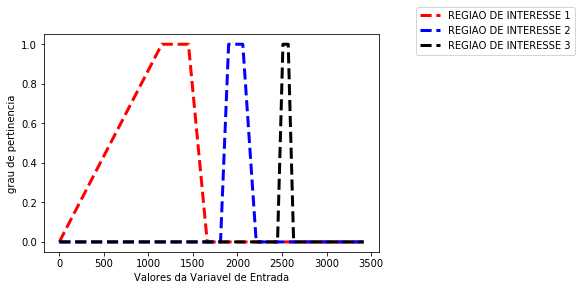

In [35]:
import skfuzzy as fuzz
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 


#OBS - é preciso ter cuidado que o tempo é particionado...vou usar a medida de PARTES POR FRAME
#parte 1 
tempoMS = np.arange(0,3418,1)  
f0 = fuzz.trapmf(tempoMS,[0 ,1150 ,1450,1660]) #função de cada Bloco
f1 = fuzz.trapmf(tempoMS,[1810,1900,2060,2210])
f2 = fuzz.trapmf(tempoMS,[2450,2510,2570,2630])
#visualizar esses caras....

fig,ax = plt.subplots()
ax.plot(tempoMS,f0,'r--',linewidth=3,label='REGIAO DE INTERESSE 1')

ax.plot(tempoMS,f1,'b--',linewidth=3,label='REGIAO DE INTERESSE 2')

ax.plot(tempoMS,f2,'k--',linewidth=3,label='REGIAO DE INTERESSE 3')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Valores da Variavel de Entrada')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


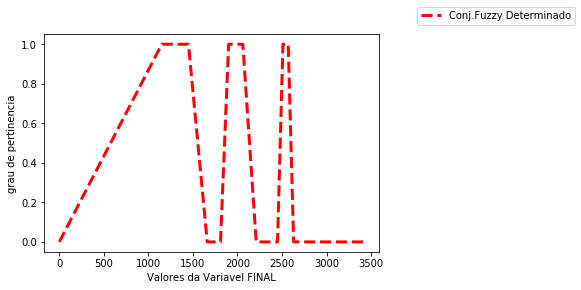

In [36]:
#O conjunto fuzzy extraído seria a união de todos esses caras...

tem1 =  fuzz.fuzzy_or(tempoMS,f0,tempoMS,f1)
conj =  fuzz.fuzzy_or(tem1[0],tem1[1],tempoMS,f2)
fig,ax = plt.subplots()
ax.plot(conj[0],conj[1],'r--',linewidth=3,label='Conj.Fuzzy Determinado')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Valores da Variavel FINAL')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


In [37]:
#conjunto com os valore de pertinência

conj[1].shape

(3418,)

array([0.        , 0.00086957, 0.00173913, ..., 0.        , 0.        ,
       0.        ])

# IREI ESCREVER OS VALORES FUZZY NO DATAFRAME DE DADOS


In [44]:
#dataframe
dfTesteEx

,0,1,2,3,4
0,33,NaN,NaN,NaN,NaN
1,66,NaN,NaN,NaN,NaN
2,100,NaN,NaN,NaN,NaN
3,133,NaN,NaN,NaN,NaN
4,166,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3413,113913,1.0,0.02,NaN,NaN
3414,113947,1.0,0.02,NaN,NaN
3415,113980,1.0,0.02,NaN,NaN
3416,114013,1.0,0.02,NaN,NaN


In [46]:
dfTesteEx.shape

(3418, 5)

In [51]:
dfTesteEx2

,0,1,2,3,4
0,33,NaN,NaN,NaN,NaN
1,66,NaN,NaN,NaN,NaN
2,100,NaN,NaN,NaN,NaN
3,133,NaN,NaN,NaN,NaN
4,166,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3413,113913,1.0,0.02,NaN,NaN
3414,113947,1.0,0.02,NaN,NaN
3415,113980,1.0,0.02,NaN,NaN
3416,114013,1.0,0.02,NaN,NaN


In [52]:
dfTesteEx2.shape

(3418, 5)

In [53]:
dfFuzzy = pd.DataFrame(conj[1])
dfFuzzy

,0
0,0.000000
1,0.000870
2,0.001739
3,0.002609
4,0.003478
...,...
3413,0.000000
3414,0.000000
3415,0.000000
3416,0.000000


In [62]:
dfF = pd.concat([dfTesteEx2,dfFuzzy.reindex(dfTesteEx2.index)],axis=1,ignore_index=True)
dfF

,0,1,2,3,4,5
0,33,NaN,NaN,NaN,NaN,0.000000
1,66,NaN,NaN,NaN,NaN,0.000870
2,100,NaN,NaN,NaN,NaN,0.001739
3,133,NaN,NaN,NaN,NaN,0.002609
4,166,NaN,NaN,NaN,NaN,0.003478
...,...,...,...,...,...,...
3413,113913,1.0,0.02,NaN,NaN,0.000000
3414,113947,1.0,0.02,NaN,NaN,0.000000
3415,113980,1.0,0.02,NaN,NaN,0.000000
3416,114013,1.0,0.02,NaN,NaN,0.000000


In [64]:
dfF.to_excel("DadosFuzzy.xlsx") 

In [68]:
import pandas as pd 

loc = ("DadosFuzzy.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfVerificar = pd.read_excel(loc,index_col=None, header=None)
dfVerificar #no arquivo xlsx não há esse cabeçalho 

,0,1,2,3,4,5,6
0,NaN,0,1.0,2.00,3.0,4.0,5.000000
1,0.0,33,NaN,NaN,NaN,NaN,0.000000
2,1.0,66,NaN,NaN,NaN,NaN,0.000870
3,2.0,100,NaN,NaN,NaN,NaN,0.001739
4,3.0,133,NaN,NaN,NaN,NaN,0.002609
...,...,...,...,...,...,...,...
3414,3413.0,113913,1.0,0.02,NaN,NaN,0.000000
3415,3414.0,113947,1.0,0.02,NaN,NaN,0.000000
3416,3415.0,113980,1.0,0.02,NaN,NaN,0.000000
3417,3416.0,114013,1.0,0.02,NaN,NaN,0.000000


In [65]:
dfF.to_csv("DadosFuzzy.csv")

In [2]:
!cat DadosFuzzy.csv

,0,1,2,3,4,5
0,33,,,,,0.0
1,66,,,,,0.0008695652173913044
2,100,,,,,0.0017391304347826088
3,133,,,,,0.0026086956521739132
4,166,,,,,0.0034782608695652175
5,200,,,,,0.004347826086956522
6,233,,,,,0.0052173913043478265
7,266,,,,,0.00608695652173913
8,300,,,,,0.006956521739130435
9,333,,,,,0.00782608695652174
10,367,,,,,0.008695652173913044
11,400,,,,,0.009565217391304347
12,433,,,,,0.010434782608695653
13,467,,,,,0.011304347826086957
14,500,,,,,0.01217391304347826
15,533,,,,,0.013043478260869565
16,567,,,,,0.01391304347826087
17,600,,,,,0.014782608695652174
18,633,,,,,0.01565217391304348
19,667,,,,,0.01652173913043478
20,700,,,,,0.017391304347826087
21,734,,,,,0.018260869565217393
22,767,,,,,0.019130434782608695
23,800,,,,,0.02
24,834,,,,,0.020869565217391306
25,867,,,,,0.021739130434782608
26,900,,,,,0.022608695652173914
27,934,,,,,0.023478260869565216
28,967,,,,,0.02434782608695652
29,1001,,,,,0.025217391304347827
30,1034,,,,,0.02608695652173913

32,1101,,,,,0.02782608695652174
33,1134,

In [1]:
import pandas as pd
dfFuzzy = pd.read_csv('DadosFuzzy.csv')   
dfFuzzy = dfFuzzy.fillna(0) #Retirar os NaN
dfFuzzy

,Unnamed: 0,0,1,2,3,4,5
0,0,33,0.0,0.00,0.0,0.0,0.000000
1,1,66,0.0,0.00,0.0,0.0,0.000870
2,2,100,0.0,0.00,0.0,0.0,0.001739
3,3,133,0.0,0.00,0.0,0.0,0.002609
4,4,166,0.0,0.00,0.0,0.0,0.003478
...,...,...,...,...,...,...,...
3413,3413,113913,1.0,0.02,0.0,0.0,0.000000
3414,3414,113947,1.0,0.02,0.0,0.0,0.000000
3415,3415,113980,1.0,0.02,0.0,0.0,0.000000
3416,3416,114013,1.0,0.02,0.0,0.0,0.000000


In [66]:
!cat DadosFuzzy.csv

,0,1,2,3,4,5
0,33,,,,,0.0
1,66,,,,,0.0008695652173913044
2,100,,,,,0.0017391304347826088
3,133,,,,,0.0026086956521739132
4,166,,,,,0.0034782608695652175
5,200,,,,,0.004347826086956522
6,233,,,,,0.0052173913043478265
7,266,,,,,0.00608695652173913
8,300,,,,,0.006956521739130435
9,333,,,,,0.00782608695652174
10,367,,,,,0.008695652173913044
11,400,,,,,0.009565217391304347
12,433,,,,,0.010434782608695653
13,467,,,,,0.011304347826086957
14,500,,,,,0.01217391304347826
15,533,,,,,0.013043478260869565
16,567,,,,,0.01391304347826087
17,600,,,,,0.014782608695652174
18,633,,,,,0.01565217391304348
19,667,,,,,0.01652173913043478
20,700,,,,,0.017391304347826087
21,734,,,,,0.018260869565217393
22,767,,,,,0.019130434782608695
23,800,,,,,0.02
24,834,,,,,0.020869565217391306
25,867,,,,,0.021739130434782608
26,900,,,,,0.022608695652173914
27,934,,,,,0.023478260869565216
28,967,,,,,0.02434782608695652
29,1001,,,,,0.025217391304347827
30,1034,,,,,0.02608695652173913

32,1101,,,,,0.02782608695652174
33,1134,

In [41]:
!cat Reuniao_output2.csv

In [ ]:
!cat Reuniao_output0.csv

## JOGAR DENTRO DA REDE NEURAL AGORA

 * Como será feito o processo de transição do dataframe para a rede neural?
 
     * Os dados do dataframe são feitos de modo que o par expressa o que foi detectado. Por exemplo (10,0.03) indica que foi detectado o objeto 10 ( CARRO ) e que no frame há 3 desse objeto. 
 
     * O vetor será expresso de modo que no endereço 10 haverá o valor inteiro 3 ->>> vect[9]=3 
 
     * Ainda posso usar fatores fuzzy para isso, sem falar que há muito do que se explorar tando na rede neural de detecção como na rede Convolucional

TRANSCREVER O DATAFRAME PARA A MATRIZ DE DADOS DE ENTRADA PARA A REDE NEURAL


In [2]:
dfFuzzy.describe()

,Unnamed: 0,0,1,2,3,4,5
count,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000
mean,1708.500000,57039.833236,0.549444,0.007232,0.278233,0.000699,0.403745
std,986.835937,32927.425697,2.762057,0.014574,2.535807,0.003265,0.396124
min,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,854.250000,28536.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1708.500000,57040.000000,0.000000,0.000000,0.000000,0.000000,0.309110
75%,2562.750000,85543.500000,1.000000,0.010000,0.000000,0.000000,0.805104
max,3417.000000,114047.000000,77.000000,0.090000,41.000000,0.040000,1.000000


Pela a estrutura do dataframe há 77 objetos diferentes que foi encontrado no vídeo de estudo. 
Logo o vetor de treino da rede deve havar no mínimo 77 posições.

OBSERVAÇÃO -  CRIAR UMA FUNÇÃO PARA CRIAR ESSA MATRIZ JÁ COMO RETORNO DO DATAFRAME

In [4]:
matriz.shape

NameError: name 'matriz' is not defined

In [5]:
#MATRIZ DE ENTRADA DA REDE NEURAL 
import numpy as np
linhas,colun = dfFuzzy.shape
matriz = np.zeros((linhas,77))

for i in range(linhas):
    j = 2
    while(j<colun-1):
        if dfFuzzy.values[i][j]!=0:
            matriz[i][int(dfFuzzy.values[i][j])-1] = dfFuzzy.values[i][j+1]*100
        j=j+2
            
            
matriz


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.]])

In [6]:
valorFuzzy = dfFuzzy.loc[:,'5']
valorFuzzy = valorFuzzy.values.reshape(valorFuzzy.shape[0],1)
valorFuzzy 

array([[0.        ],
       [0.00086957],
       [0.00173913],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [7]:
valorFuzzy.shape

(3418, 1)

In [8]:
valorFuzzy

array([[0.        ],
       [0.00086957],
       [0.00173913],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [9]:
MatrizFuzzy = np.hstack((matriz, valorFuzzy))
MatrizFuzzy

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.69565217e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.73913043e-03],
       ...,
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [10]:
MatrizFuzzy.shape

(3418, 78)

In [11]:
MatrizFuzzy[:][77].shape

(78,)

In [12]:
#JOGAR NOVAMENTE DENTRO DE UM DATAFRAME 
dfDados = pd.DataFrame(MatrizFuzzy)
dfDados

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000870
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001739
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002609
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3414,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3415,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3416,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [16]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")


In [17]:
#Montar treino e treste
import sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfDados, test_size=0.2,random_state=42)


In [18]:
train

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
2083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.846667
2176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.226667
1632,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133333
2609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350000
3080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.952174
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.982609
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
860,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.747826


In [19]:
test

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
3187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147826
680,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.591304
2843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.497391
2992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1582,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.371429
1886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844444


In [28]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
#Começar o treino da rede neural

X = dfDados.iloc[:, :77].values
y = dfDados.iloc[:, 77:].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [29]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])


In [30]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)


Train on 2187 samples, validate on 547 samples
Epoch 1/100
2187/2187 [==============================] - 4s 2ms/sample - loss: 0.1909 - mean_squared_error: 0.1909 - val_loss: 0.1759 - val_mean_squared_error: 0.1759
Epoch 2/100
2187/2187 [==============================] - 3s 1ms/sample - loss: 0.1735 - mean_squared_error: 0.1735 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 3/100
2187/2187 [==============================] - 2s 775us/sample - loss: 0.1517 - mean_squared_error: 0.1517 - val_loss: 0.1528 - val_mean_squared_error: 0.1528
Epoch 4/100
2187/2187 [==============================] - 2s 825us/sample - loss: 0.1456 - mean_squared_error: 0.1456 - val_loss: 0.1475 - val_mean_squared_error: 0.1475
Epoch 5/100
2187/2187 [==============================] - 2s 792us/sample - loss: 0.1465 - mean_squared_error: 0.1465 - val_loss: 0.1471 - val_mean_squared_error: 0.1471
Epoch 6/100
2187/2187 [==============================] - 2s 785us/sample - loss: 0.1446 - mean_squared_error: 0.

In [31]:
#AGORA AVALIAR A REDE NEURAL COM O EQM 
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.3766274959925004
0.369906027728505


O erro do treino o do testa está próximo...provavelmente há um boa confirmidade entre o treino e o teste..

## TESTAR A REDE NEURAL COM VÍDEO E SOLTAR O ALERTA


In [17]:
# This is needed to display the images.
%matplotlib inline
%pylab inline 
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy
import csv 
import pandas as pd

import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
#url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
url = "www.youtube.com/watch?v=I4iz_wAM0nk"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)
# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')


df = pd.DataFrame()

#matriz para compor a rede neural 
matriz =  csv.writer(open("Reuniao11.csv","w"))
with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            millis = get_current_position(cap)
            #print(millis)
            #print("\n..............\n")
            '''
            data = {}
            i=0
            while ((output_dict['detection_scores'][i]) > 0.49999):
                chave = output_dict['detection_classes'][i]
                #print((output_dict['detection_scores'][i]))
                data.setdefault(chave,[]).append(output_dict['detection_scores'][i])
                i+=1


            print(data)    

            '''
            #nao vou usar em um primeiro momento 
            #Coordenadasboxes= np.squeeze(boxes) 
            ClassesCoordenadas = np.squeeze(classes).astype(np.int32)
            Scoresdetectados = np.squeeze(scores)
            #Indcateg = category_index
            #visualizando
            '''
            print('..........\n')
            print(ClassesCoordenadas)
            print('.....\n')
            print(Scoresdetectados)
            
            '''

            data = {}
            i=1
            while ((Scoresdetectados[i]) > 0.49999):
                chave = ClassesCoordenadas[i]
                #print((output_dict['detection_scores'][i]))
                #data.setdefault(chave,[]).append(ClassesCoordenadas[i])
                data.setdefault(chave,[]).append(i)
                i+=1
            LisCh = list(data.keys())
            #TamLisCh = len(list(data.keys()))
            LisVal = list(data.values())
            
            #print("\n.......\n")
            #print("Tempo Frame - ",millis)
            #print("Extr. do Frame - ",data)
            #listaDados = [millis,data]
            listaDados = [millis]
            for i in range(len(list(data.keys()))):
                #print("Obj Encontrado - ",LisCh[i])
                listaDados.append(LisCh[i])
                #print("Qtd Obj. Econtrados - ",len(LisVal[i]))
                listaDados.append(len(LisVal[i])/100)
            
            a_series = pd.Series(listaDados)
            #dfTeste = dfTeste.append(a_series, ignore_index=True)
            df = pd.concat([df,a_series])
            #print(listaDados)    
            matriz.writerow(listaDados)
            with open('arqVideoR11.txt','a') as arq:
                arq.writelines(str(listaDados)+";\n|")
            arq.close()
            

            

            #print(millis,ke)
            #criaando o database..
            
            
        
                
            if cv2.waitKey(1) == 13: #13 is the Enter Key 
                sys.exit()
                #break


Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/ambCV2/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [17]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy
import csv 
import pandas as pd



import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
#url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
url = "www.youtube.com/watch?v=I4iz_wAM0nk"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)
# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')


df = pd.DataFrame()

#matriz para compor a rede neural 
matriz =  csv.writer(open("Reuniao11.csv","w"))
with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            millis = get_current_position(cap)
            #print(millis)
            #print("\n..............\n")
            '''
            data = {}
            i=0
            while ((output_dict['detection_scores'][i]) > 0.49999):
                chave = output_dict['detection_classes'][i]
                #print((output_dict['detection_scores'][i]))
                data.setdefault(chave,[]).append(output_dict['detection_scores'][i])
                i+=1


            print(data)    

            '''
            #nao vou usar em um primeiro momento 
            #Coordenadasboxes= np.squeeze(boxes) 
            ClassesCoordenadas = np.squeeze(classes).astype(np.int32)
            Scoresdetectados = np.squeeze(scores)
            #Indcateg = category_index
            #visualizando
            '''
            print('..........\n')
            print(ClassesCoordenadas)
            print('.....\n')
            print(Scoresdetectados)
            
            '''

            data = {}
            i=1
            while ((Scoresdetectados[i]) > 0.49999):
                chave = ClassesCoordenadas[i]
                #print((output_dict['detection_scores'][i]))
                #data.setdefault(chave,[]).append(ClassesCoordenadas[i])
                data.setdefault(chave,[]).append(i)
                i+=1
            LisCh = list(data.keys())
            #TamLisCh = len(list(data.keys()))
            LisVal = list(data.values())
            
            #print("\n.......\n")
            #print("Tempo Frame - ",millis)
            #print("Extr. do Frame - ",data)
            #listaDados = [millis,data]
            listaDados = [millis]
            for i in range(len(list(data.keys()))):
                #print("Obj Encontrado - ",LisCh[i])
                listaDados.append(LisCh[i])
                #print("Qtd Obj. Econtrados - ",len(LisVal[i]))
                listaDados.append(len(LisVal[i])/100)
            
            a_series = pd.Series(listaDados)
            #dfTeste = dfTeste.append(a_series, ignore_index=True)
            df = pd.concat([df,a_series])
            #print(listaDados)    
            matriz.writerow(listaDados)
            with open('arqVideoR11.txt','a') as arq:
                arq.writelines(str(listaDados)+";\n|")
            arq.close()
            

            #print("\n.......\n")
            '''
            for key in data:
                print(millis,data,key,data[key],len(data[key]))
                matriz.writerow([millis,data,key,data[key],len(data[key])]) 

            '''

            #print(millis,ke)
            #criaando o database..
            
            '''
            with open('arqVideo.txt','a') as arq:
                arq.write("Tempo em milissegundos {} \n".format(millis)+"\n")
                #arq.write("Coordenadas dections boxes: {} \n".format(Coordenadasboxes)+"\n")

                arq.write("Classes Coordenadas: {} \n".format(ClassesCoordenadas) +"\n")
                arq.write("Scores detectados: {} \n".format(Scoresdetectados)+"\n")
                #arq.write("Índices de Categorias: {} \n".format(Indcateg)+"\n")

            arq.close()
            
            
            #só rodar quando precisa visualizar .....
            
            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
            '''
            
            
        
                
            if cv2.waitKey(1) == 13: #13 is the Enter Key 
                sys.exit()
                #break


# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  


Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/ambCV2/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

## Agora vamos para o modelo no R / Há a possibilidade de aprender o comportamento dos dados usando a biblioteca LearningFromDataFuzzy.ipynb